In [2]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import time
import os
os.getcwd()

'/home/dean/Documents/CompPhys/hw1-deanhuang97'

<IPython.core.display.Javascript object>


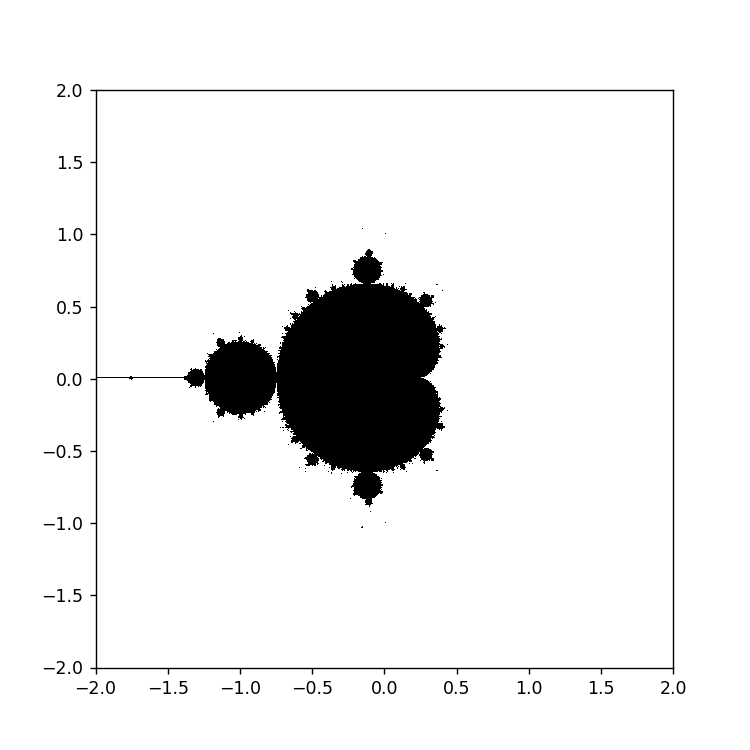

28.664767000000012


In [7]:
#Black and white
start=time.clock()
N = 1000 #the grid will be NxN points in the complex plane
niter = 100 #number of iterations
xr = [-2,2] #range of x
yr = [-2,2] #range of y
matrix = np.zeros( (N,N) ) #makes matrix of zeros
for i in range(0,N):
    for j in range(0,N):
        z=0+0j
        c=(xr[0]+(xr[1]-xr[0])*i/N)+(yr[0]+(yr[1]-yr[0])*j/N)*1j
        value=0
        for k in range(0,niter):
            z=z*z+c
            if np.absolute(z)>2:
                value=1
                break
        matrix[j,i]=value
plt.figure(figsize=(6,6))
plt.imshow(matrix, origin="lower", extent=[-2,2,-2,2])
plt.gray()
plt.show()
print (time.clock() - start)

<IPython.core.display.Javascript object>


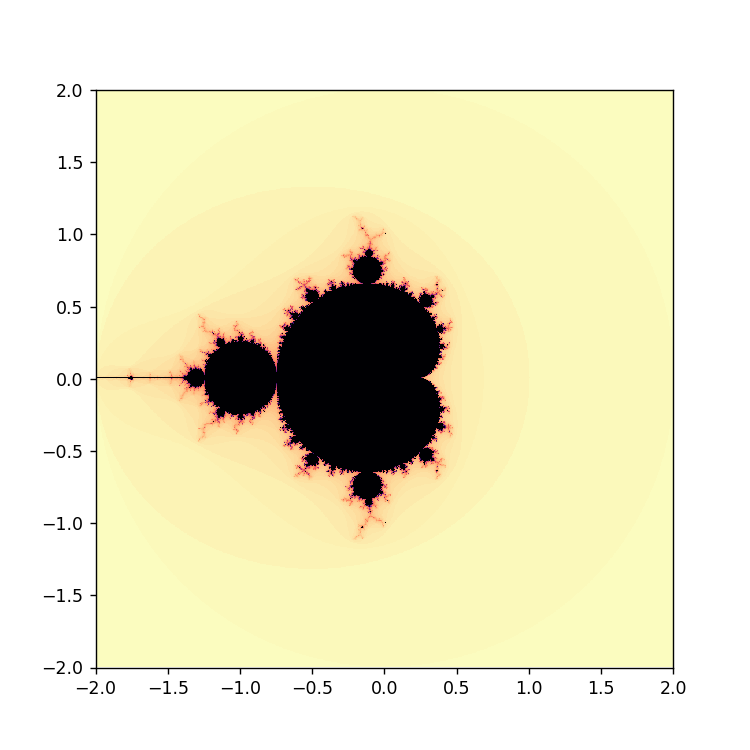

27.512137999999993


In [6]:
#Using magma colormap, with colors scaled by how many iterations it takes for the c to be discarded.
start=time.clock()
N = 1000 #the grid will be NxN points in the complex plane
niter = 100 #number of iterations
xr = [-2,2] #range of x
yr = [-2,2] #range of y
matrix = np.zeros( (N,N) ) #makes matrix of zeros
for i in range(0,N):
    for j in range(0,N):
        z=0+0j
        c=(xr[0]+(xr[1]-xr[0])*i/N)+(yr[0]+(yr[1]-yr[0])*j/N)*1j
        value=0
        for k in range(0,niter):
            z=z*z+c
            if np.absolute(z)>2:
                value=1-(k/(niter-1))
                break
        matrix[j,i]=value
plt.figure(figsize=(6,6))
plt.imshow(matrix, origin="lower", extent=[-2,2,-2,2], cmap=plt.cm.magma)
plt.show()
print (time.clock() - start)

<IPython.core.display.Javascript object>


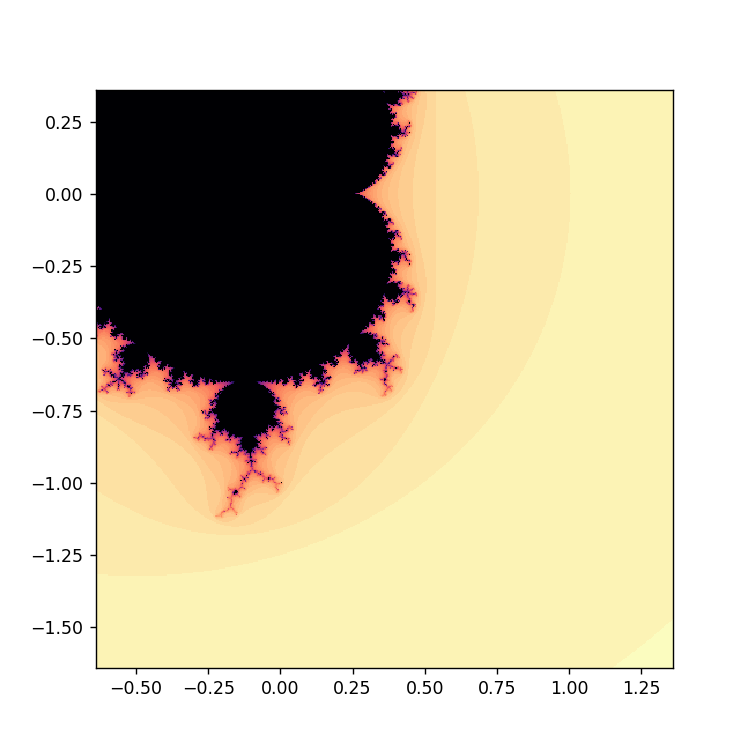

<IPython.core.display.Javascript object>


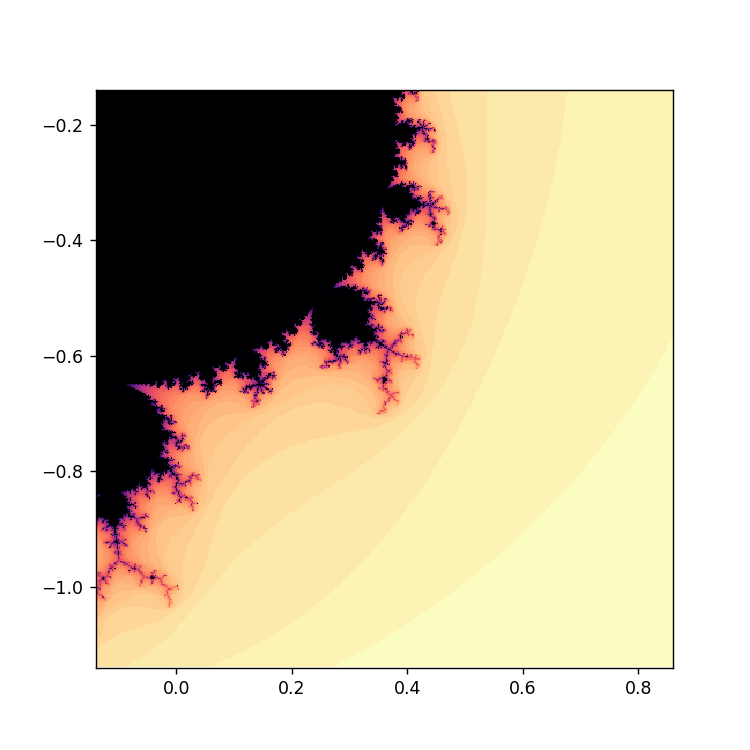

<IPython.core.display.Javascript object>


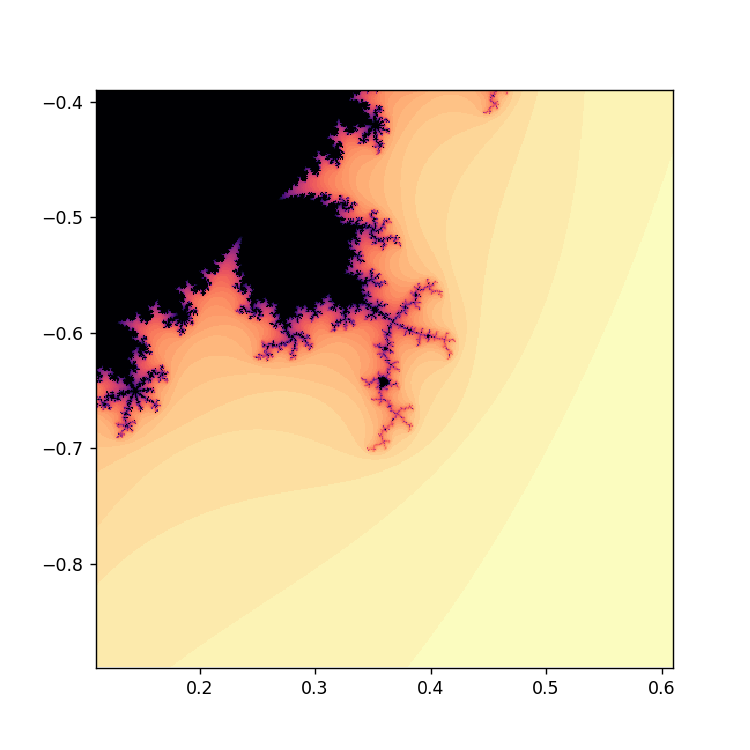

<IPython.core.display.Javascript object>


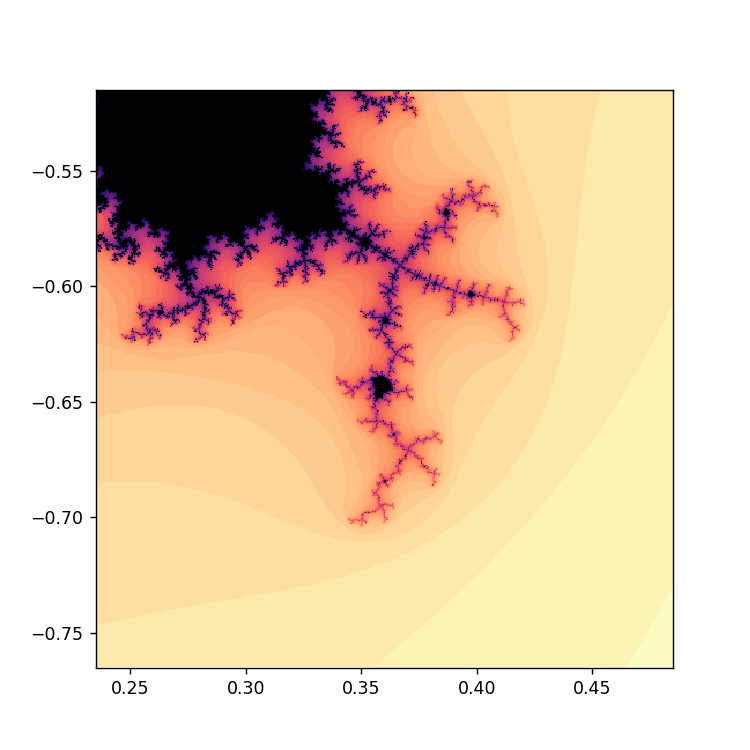

<IPython.core.display.Javascript object>


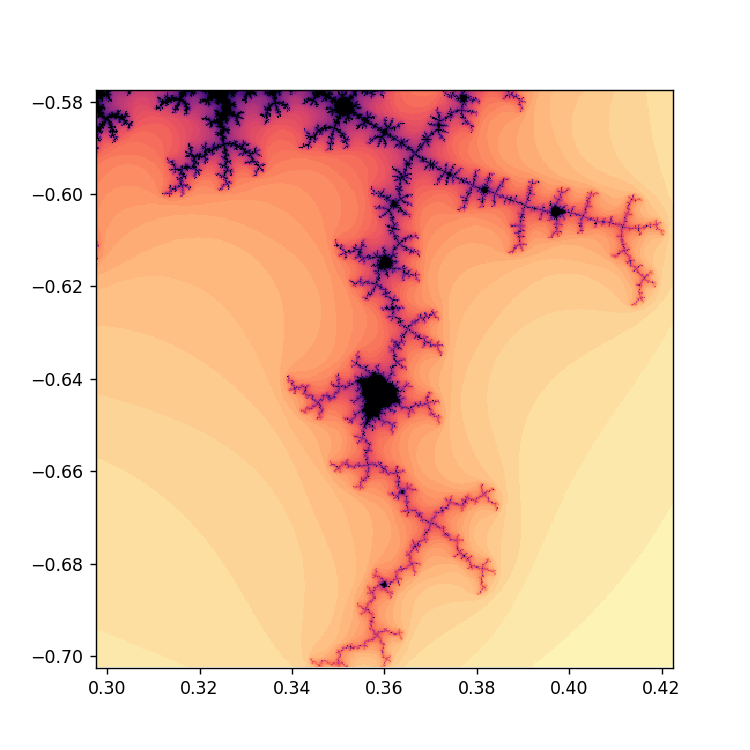

<IPython.core.display.Javascript object>


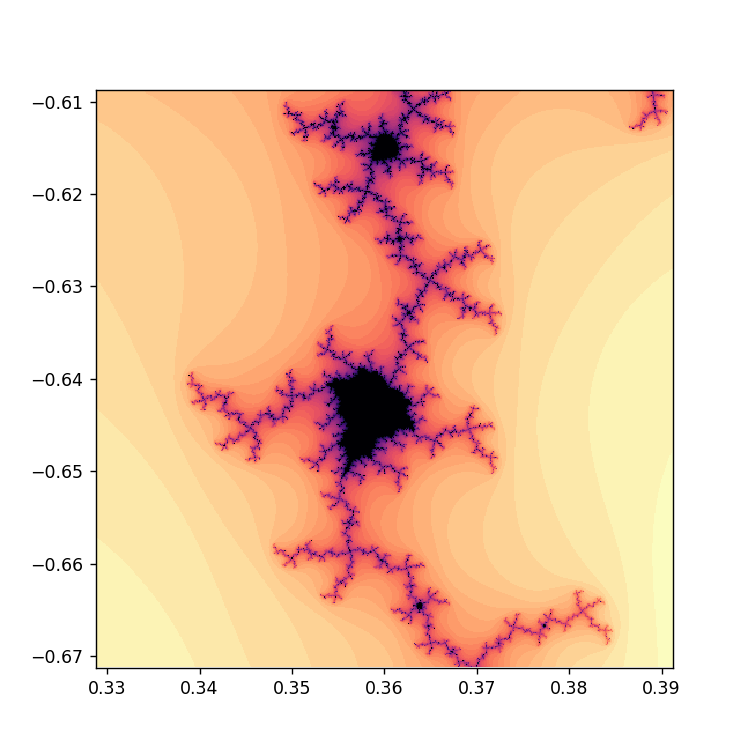

75.09426500000006


In [15]:
#zooming in
start=time.clock()

N = 500 #the grid will be NxN points in the complex plane
niter = 50 #number of iterations
cx = 0.36
cy = -0.64

for k in range(0,6):
    delta = 1/(2**k)
    xr = [cx-delta,cx+delta] #range of x
    yr = [cy-delta,cy+delta] #range of y
    matrix = np.zeros( (N,N) ) #makes matrix of zeros
    plt.figure(figsize=(6,6))
    for i in range(0,N):
        for j in range(0,N):
            z=0+0j
            c=(xr[0]+(xr[1]-xr[0])*i/N)+(yr[0]+(yr[1]-yr[0])*j/N)*1j
            value=0
            for k in range(0,niter):
                z=z*z+c
                if np.absolute(z)>2:
                    value=1-(k/(niter-1))
                    break
            matrix[j,i]=value
    plt.imshow(matrix, origin="lower", extent=[cx-delta,cx+delta,cy-delta,cy+delta], cmap=plt.cm.magma)
    plt.show()
print(time.clock()-start)

<IPython.core.display.Javascript object>


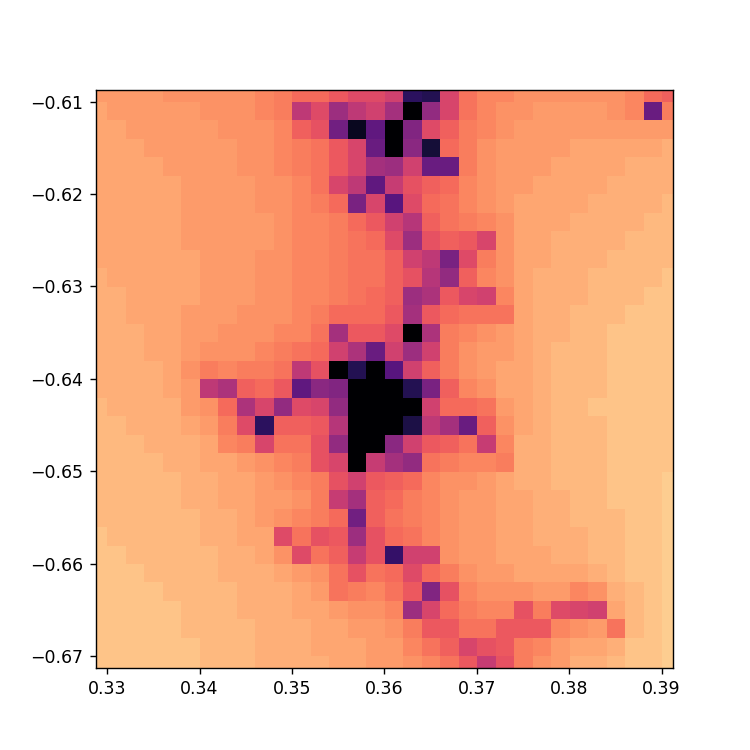

50.46377099999995


In [14]:
#Failed attempt at making the zooming into an animation. Problem arises when trying to rescale the axes for each plot.
import matplotlib.animation as animation
from IPython.display import HTML
start=time.clock()
N = 500 #the grid will be NxN points in the complex plane
niter = 50 #number of iterations
cx = 0.36
cy = -0.64

fig = plt.figure(figsize=(6,6))

ims = []

for k in range(0,6):
    delta = 1/(2**k)
    xr = [cx-delta,cx+delta] #range of x
    yr = [cy-delta,cy+delta] #range of y
    matrix = np.zeros( (N,N) ) #makes matrix of zeros
    for i in range(0,N):
        for j in range(0,N):
            z=0+0j
            c=(xr[0]+(xr[1]-xr[0])*i/N)+(yr[0]+(yr[1]-yr[0])*j/N)*1j
            value=0
            for k in range(0,niter):
                z=z*z+c
                if np.absolute(z)>2:
                    value=1-(k/(niter-1))
                    break
            matrix[j,i]=value
    im = plt.imshow(matrix, origin="lower", extent=[cx-delta,cx+delta,cy-delta,cy+delta], cmap=plt.cm.magma)
    ims.append([im])

MandelZoom = animation.ArtistAnimation(fig, ims, interval=1000, blit=True,
                                repeat_delay=1000)

HTML(MandelZoom.to_html5_video())

print(time.clock()-start)